# Using LittleVGG for Emotion Detection

### Training Emotion Detector

In [7]:
from __future__ import print_function
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization

from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
from keras.models import Sequential
from keras.layers import BatchNormalization

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1


In [ ]:
## initializing 

In [12]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = '../fer2013/train'
validation_data_dir = '../fer2013/validation'

In [13]:


# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
print(validation_generator.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [15]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(BatchNormalization())

model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))


/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 7)        │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 7)        │           791 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,950 (945.12 KB)

 Trainable params: 241,950 (945.12 KB)

 Non-trainable params: 0 (0.00 B)

## Training our model

In [17]:
# If you want to train the same model or try other models, go for this

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Update the filepath to use the .keras extension
filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.keras")

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',  # Use 'val_accuracy' instead of 'val_acc'
                             verbose=1,
                             save_best_only=True,
                             mode='max')

callbacks = [checkpoint]
# if mode == "train":
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),  # Updated `lr` to `learning_rate`
    metrics=['accuracy']
)
nb_train_samples = 28709
nb_validation_samples = 3589
epochs = 150
# Fit the model
model_info = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)


# plot_model_history(model_info)
# model.save_weights('model.h5')


/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2174 - loss: 1.9597

/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.23996, saving model to ./emotion_detector_models/model_v6_1.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2178 - loss: 1.9594 - val_accuracy: 0.2400 - val_loss: 1.9261
Epoch 2/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:20 3s/step - accuracy: 0.2441 - loss: 1.9166

2024-11-25 21:29:48.670276: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.23996 to 0.25223, saving model to ./emotion_detector_models/model_v6_2.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2441 - loss: 1.9166 - val_accuracy: 0.2522 - val_loss: 1.9207
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2513 - loss: 1.9189
Epoch 3: val_accuracy did not improve from 0.25223
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2513 - loss: 1.9189 - val_accuracy: 0.2000 - val_loss: 2.0382
Epoch 4/150


2024-11-25 21:32:08.308889: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:08 2s/step - accuracy: 0.2324 - loss: 1.9192
Epoch 4: val_accuracy improved from 0.25223 to 0.25419, saving model to ./emotion_detector_models/model_v6_4.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.2324 - loss: 1.9192 - val_accuracy: 0.2542 - val_loss: 1.9133
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2520 - loss: 1.9149
Epoch 5: val_accuracy did not improve from 0.25419
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2520 - loss: 1.9148 - val_accuracy: 0.2492 - val_loss: 1.9016
Epoch 6/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.2266 - loss: 1.9132
Epoch 6: val_accuracy improved from 0.25419 to 0.40000, saving model to ./emotion_detector_models/model_v6_6.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2266 - loss: 1.9132 - val_accuracy: 0.4000 - val_loss: 1.8009
Epoch 7/150


2024-11-25 21:34:36.817027: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2518 - loss: 1.8962
Epoch 7: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2518 - loss: 1.8961 - val_accuracy: 0.2480 - val_loss: 1.8930
Epoch 8/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:20 3s/step - accuracy: 0.2734 - loss: 1.8535
Epoch 8: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.2734 - loss: 1.8535 - val_accuracy: 0.2492 - val_loss: 1.8886
Epoch 9/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2507 - loss: 1.8868
Epoch 9: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.2508 - loss: 1.8867 - val_accuracy: 0.2000 - val_loss: 1.8569
Epoch 10/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:24 3s/step - accuracy: 0.2520 - loss: 1.8737

2024-11-25 21:39:52.255407: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.2520 - loss: 1.8737 - val_accuracy: 0.2584 - val_loss: 1.8639
Epoch 11/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2601 - loss: 1.8368
Epoch 11: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.2601 - loss: 1.8366 - val_accuracy: 0.2492 - val_loss: 1.8137
Epoch 12/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.2637 - loss: 1.8163
Epoch 12: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2637 - loss: 1.8163 - val_accuracy: 0.1000 - val_loss: 1.8769
Epoch 13/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2622 - loss: 1.8007
Epoch 13: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2622 - loss: 1.8007 - val_accuracy: 0.2556 - val_loss: 1.7908
Epoch 14/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:11 2s/step - accuracy: 0.2578

2024-11-25 21:51:18.801070: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2773 - loss: 1.7683 - val_accuracy: 0.2732 - val_loss: 1.7759
Epoch 21/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2746 - loss: 1.7739
Epoch 21: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.2746 - loss: 1.7739 - val_accuracy: 0.2000 - val_loss: 1.7336
Epoch 22/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:23 2s/step - accuracy: 0.2949 - loss: 1.7573
Epoch 22: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2949 - loss: 1.7573 - val_accuracy: 0.2799 - val_loss: 1.7654
Epoch 23/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2684 - loss: 1.7806
Epoch 23: val_accuracy did not improve from 0.40000
56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2685 - loss: 1.7804 - val_accuracy: 0.2921 - val_loss: 1.7462
Epoch 24/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:28 2s/step - accuracy: 0.2715 

2024-11-25 22:05:42.622011: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:29 2s/step - accuracy: 0.3535 - loss: 1.7189
Epoch 40: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3535 - loss: 1.7189 - val_accuracy: 0.3585 - val_loss: 1.6850
Epoch 41/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3163 - loss: 1.7185
Epoch 41: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3163 - loss: 1.7185 - val_accuracy: 0.3521 - val_loss: 1.6771
Epoch 42/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:30 2s/step - accuracy: 0.2793 - loss: 1.7156
Epoch 42: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 488us/step - accuracy: 0.2793 - loss: 1.7156 - val_accuracy: 0.5000 - val_loss: 1.4646
Epoch 43/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3222 - loss: 1.7115
Epoch 43: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3221 - loss: 1.7116 - val_accuracy: 0.3638 - val_loss: 1.660

2024-11-25 22:35:54.960880: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3618 - loss: 1.6406
Epoch 79: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3617 - loss: 1.6406 - val_accuracy: 0.3987 - val_loss: 1.5832
Epoch 80/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:40 2s/step - accuracy: 0.3340 - loss: 1.6536
Epoch 80: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3340 - loss: 1.6536 - val_accuracy: 0.3912 - val_loss: 1.5879
Epoch 81/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3656 - loss: 1.6431
Epoch 81: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3655 - loss: 1.6431 - val_accuracy: 0.3000 - val_loss: 1.6467
Epoch 82/150
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1:23 2s/step - accuracy: 0.3789 - loss: 1.6140
Epoch 82: val_accuracy did not improve from 0.60000
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.3789 - loss: 1.6140 - val_accuracy: 0.4012 - val_loss: 1.5751

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


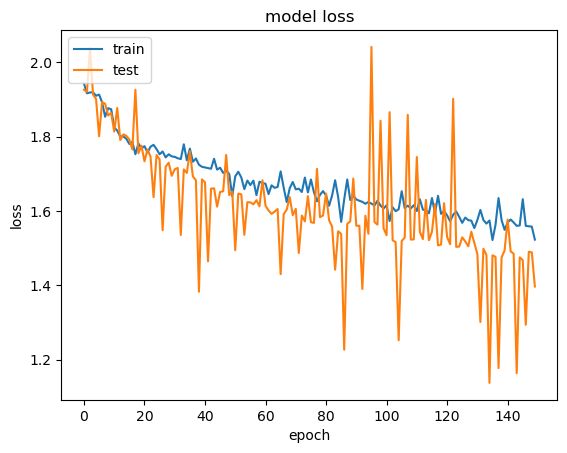

In [18]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.load_weights(os.path.join("./emotion_detector_models/model_v6_135.keras"))

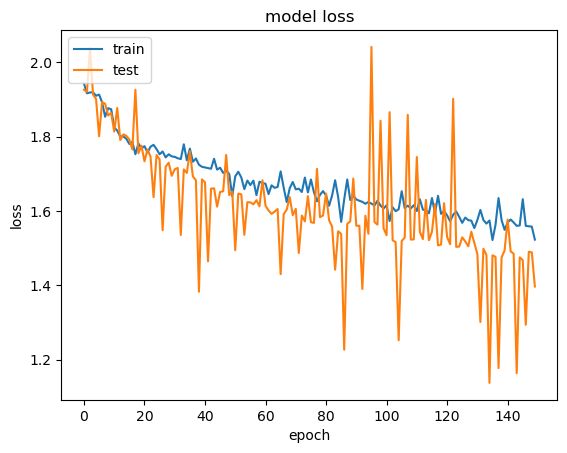

In [23]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 7178 images belonging to 7 classes.


/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step
Confusion Matrix
[[ 337    0   98  232  103  112   76]
 [  33    0    9   42   13    5    9]
 [ 165    0  170  194  133  133  229]
 [ 138    0   53 1333   91   62   97]
 [ 151    0  111  283  449  132  107]
 [ 246    0  139  265  206  297   94]
 [  55    0   68   82   40   20  566]]
Classification Report
              precision    recall  f1-score   support

       angry       0.30      0.35      0.32       958
     disgust       0.00      0.00      0.00       111
        fear       0.26      0.17      0.20      1024
       happy       0.55      0.75      0.63      1774
     neutral       0.43      0.36      0.40      1233
         sad       0.39      0.24      0.30      1247
    surprise       0.48      0.68      0.56       831

    accuracy                           0.44      7178
   macro avg       0.34      0.36      0.35      7178
weighted avg       0.41      0.44      0.41      7178



/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kavindulakshitha/Developer/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

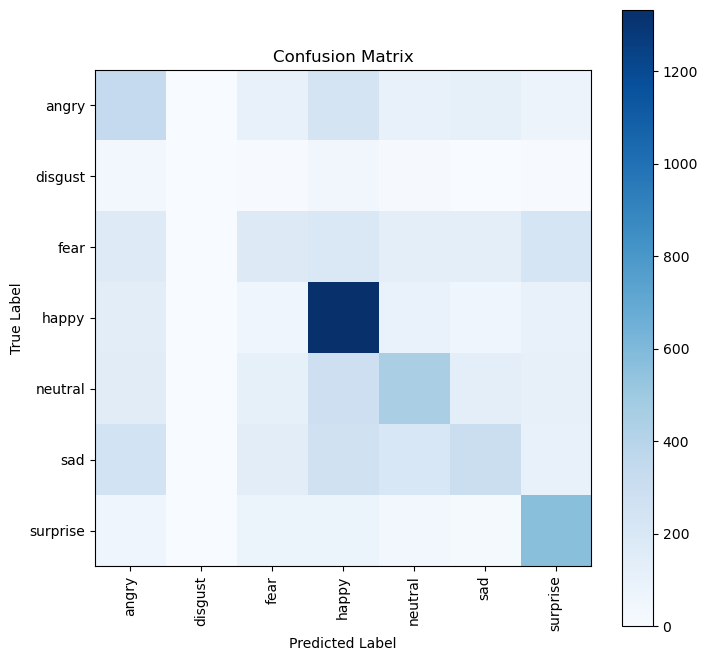

In [26]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 28709 images belonging to 7 classes.
# Found 3589 images belonging to 7 classes.


# nb_train_samples = 28273
# nb_validation_samples = 3534
nb_train_samples = 28709
nb_validation_samples = 3589
# Paths and settings
validation_datagen = ImageDataGenerator(rescale=1.0/255)
# We need to recreate our validation generator with shuffle = false
# Paths and settings
validation_data_dir = '../fer2013/validation'  # Update with your path
img_rows, img_cols = 48, 48  # Update to your image dimensions
batch_size = 32

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Class labels mapping
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Loading our saved model

In [1]:
from keras.models import load_model

classifier = load_model('./emotion_detector_models/model_v6_135.keras')

### Get our class labels

In [28]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 7178 images belonging to 7 classes.
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


### Let's test on some of validation images

In [ ]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predicted - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path, img_width, img_height):
    """function loads a random image from a random folder in our test path"""
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size=(img_width, img_height), color_mode='grayscale'), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = '../fer2013/validation/'  # Update with the correct path
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predictions.append(np.argmax(classes, axis=1))  # Get the class index

for i in range(0, len(files)):
    image = cv2.imread(files[i])
    image = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2024-11-25 23:50:12.698 python[62496:15625925] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-25 23:50:12.698 python[62496:15625925] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


### Test on a single image

In [ ]:
import cv2
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import img_to_array

# Specify the correct path to your Haar cascade file
face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

# Check if the classifier is loaded correctly
if face_classifier.empty():
    raise IOError("Haar cascade file not loaded correctly. Check the file path.")

# Define class labels for emotion detection (update this list as per your model)
class_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return (0, 0, 0, 0), np.zeros((48, 48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x, w, y, h))
    return rects, allfaces, img

img = cv2.imread("../test_images/rajeev.jpg")

# Ensure the image is loaded correctly
if img is None:
    print("Error: Image not found.")
else:
    rects, faces, image = face_detector(img)

    i = 0
    for face in faces:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # Make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]   

        # Overlay our detected emotion on our picture
        label_position = (rects[i][0] + int((rects[i][1] / 2)), abs(rects[i][2] - 10))
        i += 1
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imshow("Emotion Detector", image)
    cv2.waitKey(0)

cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


2024-11-25 23:57:10.318 python[74764:15860250] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-25 23:57:10.318 python[74764:15860250] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


### Let's try this on our webcam


In [ ]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        cv2.imshow('Camera Feed', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


2024-11-26 00:00:06.611 python[79746:15871017] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
2024-11-26 00:00:08.658 python[79746:15871017] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-26 00:00:08.659 python[79746:15871017] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 

: 

In [ ]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load your trained classifier model (replace with your actual model file path)
classifier = load_model('./emotion_detector_models/model_v6_135.keras')  # Use your model file's path

# Define the emotion labels based on your classifier's training
class_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Load the face detection model
face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if len(faces) == 0:
        return (0, 0, 0, 0), np.zeros((48, 48), np.uint8), img
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
    except:
        return (x, w, y, h), np.zeros((48, 48), np.uint8), img
    
    return (x, w, y, h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0  # Normalize
        roi = img_to_array(roi)  # Convert image to array
        roi = np.expand_dims(roi, axis=0)  # Expand dimensions for the model input

        # Make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]  # Get predictions from the model
        label = class_labels[preds.argmax()]  # Get the label with the highest probability
        
        # Position the label on the image
        label_position = (rect[0] + int((rect[1] / 2)), rect[2] + 25)
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

    # Show the image with the emotion label
    cv2.imshow('Emotion Detector', image)

    # Exit the loop when 'Enter' key is pressed
    if cv2.waitKey(1) == 13:  # 13 is the Enter key
        break

cap.release()
cv2.destroyAllWindows()


2024-11-26 19:53:25.578 python[57785:16074684] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


2024-11-26 19:53:27.776 python[57785:16074684] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-26 19:53:27.776 python[57785:16074684] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

: 